In [10]:
# Packages we will use throughout this notebook
using Makie
using XLSX
using VegaDatasets
using DataFrames
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using UMAP
using MLBase
using Distances

In [11]:
C = DataFrame(VegaDatasets.dataset("cars"))
dropmissing!(C)
M = Matrix(C[:,2:7])
car_origin = C[:,:Origin]
carmap = labelmap(car_origin) #from MLBase
uniqueids = labelencode(carmap,car_origin)
# center and normalize the data
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)


392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
  ⋮                                                       ⋮
 -0.185255   0.309571   0.359199   0.195645  -0.167864   -0.304954
  1.09597   -0.862911  -0.481748  -0.220035  -0.368005   -0.594928
  1.60847   -0.862911  -0.567753  -0.531795  -0.715308   -0.92115
  0.455359  -0.862911  -0.414854  -0.375915  -0.0324748  

In [12]:
L = cor(data,data,dims=2)
embedding = umap(L, 2)

2×392 Matrix{Float64}:
 -8.79555  -8.35198  -8.27216  -8.67124  …   2.15148   7.26062  7.36355
 -3.79844  -3.51182  -4.35827  -3.73307     -0.501779  3.16776  3.06423

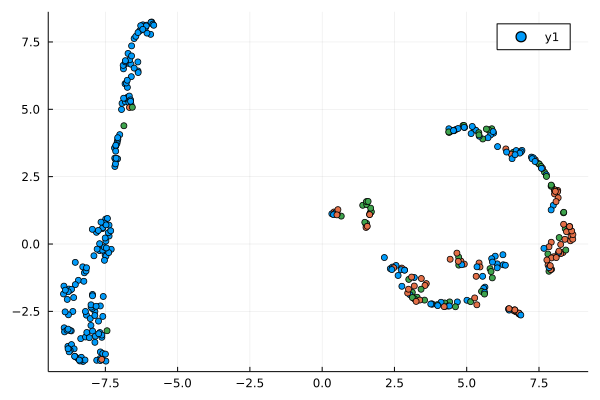

In [13]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)


In [14]:
L = pairwise(Euclidean(), data, data,dims=1) 
embedding = umap(-L, 2)

2×392 Matrix{Float64}:
 -7.56474   -9.17597  -8.14954   -8.08669   …   6.3323    3.59423   3.54167
  0.680303  -1.91899   0.402627   0.455421     -4.06208  -2.67463  -2.876

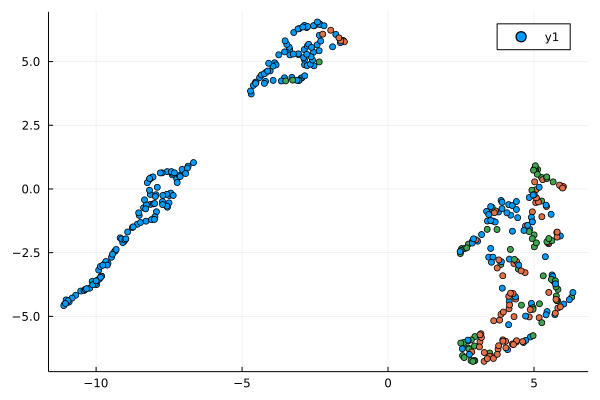

In [15]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)
